<a href="https://colab.research.google.com/github/yaswanth19/RNA-Scope-Image-Analysis/blob/main/RNA_Analysis_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from skimage import filters, feature, measure,transform,draw,color, io
import pylab

import gc

In [3]:
path='/content/WT F1 D1_C0.tif'
tif_image = Image.open(path)

# Convert the TIF image to RGB format
tif_image = tif_image.convert('RGB')

# Save the image as a PNG file
tif_image.save('image.png', 'PNG')

In [4]:
del tif_image
gc.collect()

0

In [5]:
img = Image.open('/content/image.png')
mag_factor = 5
resized_img = img.resize((int(img.size[0]*mag_factor), int(img.size[1]*mag_factor)))
resized_arr= np.array(resized_img)

In [6]:
# arr=resized_arr[:,:,:3]
# img.show()

In [7]:
# plt.imshow(arr)

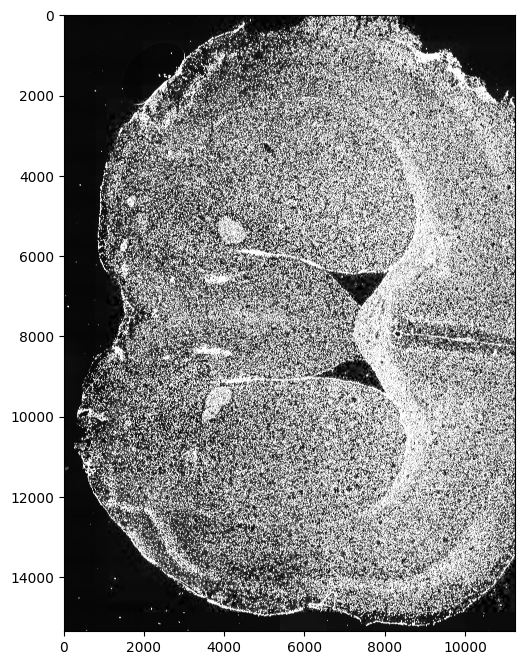

In [8]:
# Doing basic thresholding and other processing to get a better image
lower = np.array([0, 0, 0])
upper = np.array([100, 255, 255])

# image to the HSV color space
hsv = cv2.cvtColor(resized_arr, cv2.COLOR_BGR2HSV)

#thresholding the image in the HSV color space
mask = cv2.inRange(hsv, lower, upper)

# Apply bitwise-and to the original image and the mask to extract the particles
img_array = cv2.bitwise_and(resized_arr,resized_arr, mask=mask)

plt.figure(figsize=(8,8))
rgb_image=cv2.cvtColor(img_array, cv2.COLOR_BGRA2BGR)
plt.imshow(rgb_image)

In [9]:
del resized_arr,resized_img
gc.collect()

92

In [10]:
copy_img=rgb_image

In [11]:
gray = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

#Adaptive thresholding to segment the image
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

#Morphological operations to clean up the image
kernel = np.ones((2,2), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

In [12]:
del opening,blur,gray,thresh
gc.collect()

0

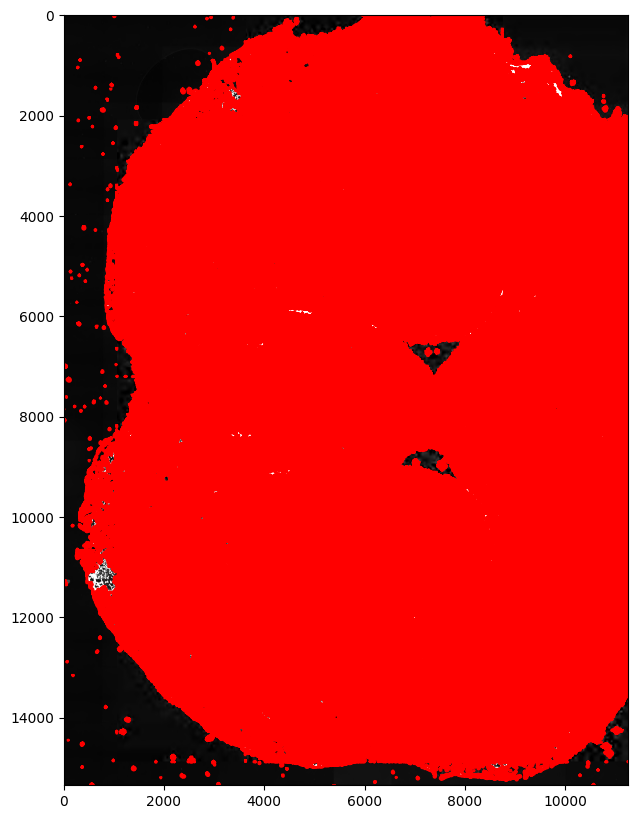

In [13]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
del closing
gc.collect()

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
for contour in contours:
    ax.plot(contour[:,:,0], contour[:,:,1], linewidth=2, color='red')
plt.show()

In [14]:
print(len(contours))
del rgb_image
gc.collect()

139306


0

In [15]:
if not os.path.exists('Images/'):
  os.mkdir('Images/')

In [16]:
#Drawing a BBox and saving that region
for i, contour in enumerate(contours):
    (x,y,w,h) = cv2.boundingRect(contour)
    roi = (copy_img[y:y+h, x:x+w])
    cv2.imwrite('Images/particle{}.jpg'.format(i), roi)

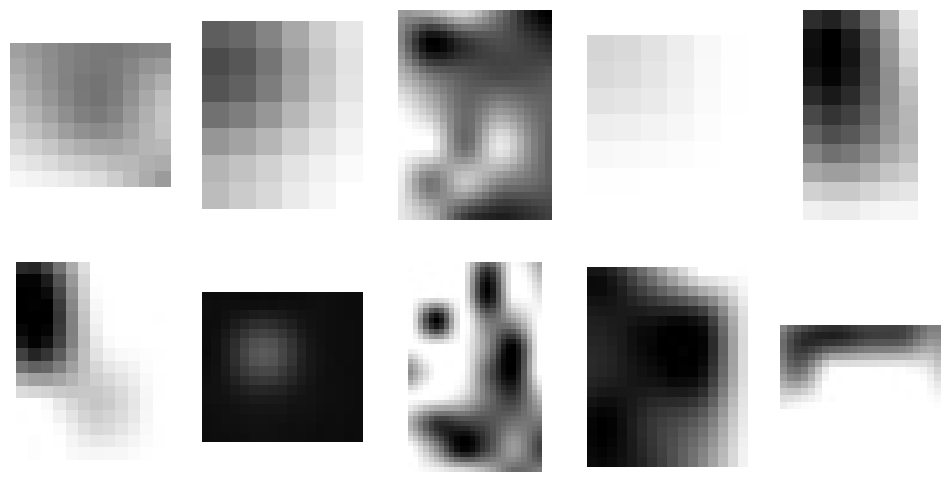

In [17]:
import random
lst=os.listdir('/content/Images/')
random_files = random.sample(lst, 10)
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i, file_name in enumerate(random_files):
    # Open the image file
    image = Image.open(os.path.join('/content/Images/', file_name))
    image_array = np.array(image)
    row = i // 5
    col = i % 5
    axs[row, col].imshow(image_array)
    axs[row, col].axis('off')

plt.show()
# Need more magnification for better pixaled particle images